Compare the difference.<br>

In [192]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [193]:
def generate_oe_matrix(variance_threshold_L = 0.7, variance_threshold_U = 0.8):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(6, 6) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.728106341225417 

[[16.81 17.43 11.18 14.95 14.88 14.68]
 [17.43 24.86 19.88  3.94 26.9  11.67]
 [11.18 19.88 63.82 29.82 10.48  8.09]
 [14.95  3.94 29.82 14.13  7.63 19.23]
 [14.88 26.9  10.48  7.63 10.01 24.36]
 [14.68 11.67  8.09 19.23 24.36 11.97]] 



### PCA
MOSAIC perform PCA on O/E matrix <br>

In [194]:
n = len(oe_zero[0])
x_t = np.transpose(oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [195]:
print('explained_variances')
print(explained_variances, '\n')
print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
print((V_Cx > 0) == (Vh > 0), '\n')

explained_variances
[0.73 0.13 0.1  0.04 0.   0.  ] 

The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False False False False  True]] 



In [196]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n')

corr_oe
[[ 1.    0.11 -0.77 -0.84  0.5   0.27]
 [ 0.11  1.   -0.05 -0.33  0.22  0.03]
 [-0.77 -0.05  1.    0.69 -0.41 -0.5 ]
 [-0.84 -0.33  0.69  1.   -0.31 -0.56]
 [ 0.5   0.22 -0.41 -0.31  1.   -0.48]
 [ 0.27  0.03 -0.5  -0.56 -0.48  1.  ]] 

V_Cx[0]
[-33.79 -18.87 397.52 131.91 -67.17 -56.81] 

Vh[0]
[-0.08 -0.04  0.93  0.31 -0.16 -0.13] 

cov_x
[[  3.98   1.68 -29.82 -13.99   7.32   2.9 ]
 [  1.68  61.03  -7.96 -21.38  12.6    1.23]
 [-29.82  -7.96 372.81 110.59 -58.55 -51.85]
 [-13.99 -21.38 110.59  69.14 -19.27 -25.17]
 [  7.32  12.6  -58.55 -19.27  54.3  -19.1 ]
 [  2.9    1.23 -51.85 -25.17 -19.1   28.93]] 

cov_x_sum
[59.688027269315, 105.86444389061258, 631.5704300918271, 259.5383034793259, 171.13295444102906, 129.17701683610042] 



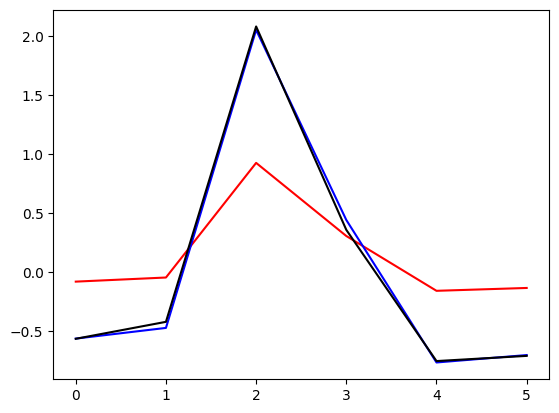

In [197]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh[0], c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [198]:
plt.clf()

<Figure size 640x480 with 0 Axes>

HOMER perform PCA on correlation matrix <br>

In [199]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [200]:
print('explained_variances')
print(explained_variances, '\n')
print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
print((V_Cx > 0) == (Vh > 0), '\n')

explained_variances
[0.74 0.19 0.07 0.01 0.   0.  ] 

The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True False False  True  True]] 



In [201]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.    0.11 -0.77 -0.84  0.5   0.27]
 [ 0.11  1.   -0.05 -0.33  0.22  0.03]
 [-0.77 -0.05  1.    0.69 -0.41 -0.5 ]
 [-0.84 -0.33  0.69  1.   -0.31 -0.56]
 [ 0.5   0.22 -0.41 -0.31  1.   -0.48]
 [ 0.27  0.03 -0.5  -0.56 -0.48  1.  ]] 

V_Cx[0]
[-0.8  -0.23  0.78  0.82 -0.4  -0.44] 

Vh[0]
[-0.53 -0.15  0.51  0.54 -0.26 -0.29] 

cov_x
[[ 0.44  0.1  -0.41 -0.42  0.24  0.2 ]
 [ 0.1   0.17 -0.09 -0.14  0.09  0.04]
 [-0.41 -0.09  0.42  0.41 -0.2  -0.23]
 [-0.42 -0.14  0.41  0.45 -0.18 -0.26]
 [ 0.24  0.09 -0.2  -0.18  0.29 -0.07]
 [ 0.2   0.04 -0.23 -0.26 -0.07  0.31]] 

cov_x_sum
[1.8151349580539646, 0.6166546269690936, 1.7547670035321963, 1.8629654025640385, 1.0731906063448369, 1.110144816152206] 



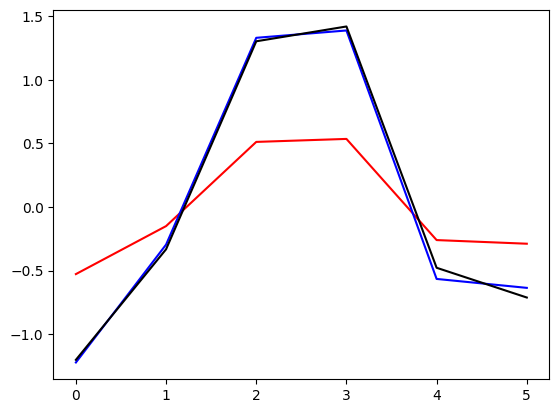

In [202]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh[0], c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [203]:
plt.clf()

<Figure size 640x480 with 0 Axes>